# 1. Problem Statement

**Crime rates differ widely across different times and different places, and may depend upon number of factors like income of people living there, their education level, population, etc. According to some studies, it is investigated that the crime rate is reduces in police presence. So police play a vital role in reducing crime rate. But number of police personals are not that much or it is not possible to place all police personals in all places. Administration have to choose the places where they are going to place a large number of police personals throughout their county.**

**Now question arises... How they are gonna choose those places. First solution comes to your mind is check the number of cases of that place. Yes, you think well. But may be there are some places where number of cases are low but crime rate start rising at particular time or high cases place is now not showing crime rate. There are lot of questions and if you try to find the answers manually, it take  a large amount of time. **

**But What if told you that you can predict the crime rate easily from the past collected data within short span of time? Yes, this can be done with the help of Machine Learning.**


> "The new crime-fighting weapon of choice for a growing number of police forces around the world isn't a gun, a taser or pepper spray - it's data."**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/variable_description.csv
/kaggle/input/train.csv
/kaggle/input/test.csv


*Let's get started......*

# 2. Data

We are considering the data about 99 standard metropolitan areas in the US. This dataset provides information on 11 variables for each area for the period 1976-1977.The areas have been divided into 4 geographic regions: 1=North-East, 2=North-Central, 3=South, 4=West. The variables provided are listed in the table below:


In [2]:
train = pd.read_csv("/kaggle/input/train.csv")
test = pd.read_csv("/kaggle/input/test.csv")
variable_description = pd.read_csv("/kaggle/input/variable_description.csv")

In [3]:
# print varible list
variable_description

,Variable name,Description
0,land_area,size in square miles
1,total_population,estimated population in thousands
2,percent_city,percent of population in central city/cities
3,percent_senior,percent of population ≤ 65 years
4,physicians,number of professionally active physicians
5,hospital_beds,total number of hospital beds
6,graduates,percent of adults that finished high school
7,labor,number of persons in labor force in thousands
8,income,total income in 1976 in millions of dollars
9,crimes,number of serious crimes


In [4]:
# print first 5 rows of train dataset
train.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,labor,income,region,crime_rate
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.55
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2,56.03
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,41.32
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2,67.38
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4,80.19


In [5]:
test1 = test.drop('crime_rate',axis=1)
test1.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,labor,income,region
0,3650,34.6,11.1,2358,6224,62.9,539.3,7792,4
1,4883,72.4,7.3,873,2236,64.9,185.2,2353,4
2,1435,13.4,11.7,342,1076,44.7,156.8,2165,1
3,2042,24.5,16.5,4071,10039,51.9,681.7,10166,3
4,1630,41.9,10.7,724,4395,50.0,198.0,2445,3


# 3. Data analysis

Before making the machine learning model that predict the crime rate, we firstly see the data what it can tell us.

# 3.1 Basic Stat of each column
describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

In [6]:
train.describe()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,labor,income,region,crime_rate
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,2615.727273,42.518182,9.781818,1828.333333,6345.868687,54.463636,449.366667,6762.505051,2.494949,55.643030
std,3045.826210,17.348277,2.524547,3192.199763,9136.202716,7.773286,610.990885,10393.349660,1.013921,13.470943
min,47.000000,13.400000,3.900000,140.000000,481.000000,30.300000,66.900000,769.000000,1.000000,23.320000
25%,1408.000000,30.100000,8.350000,459.000000,2390.000000,50.250000,150.300000,2003.000000,2.000000,46.115000
50%,1951.000000,39.500000,9.700000,774.000000,3472.000000,54.000000,257.200000,3510.000000,3.000000,56.060000
75%,2890.500000,52.600000,10.750000,1911.500000,6386.500000,58.300000,436.500000,6283.500000,3.000000,63.860000
max,27293.000000,100.000000,21.800000,25627.000000,69678.000000,72.800000,4083.900000,72100.000000,4.000000,85.620000


# 3.2 Check Missing values

Check the missing values in the data set that may cause overfitting or underfitting in the model

In [7]:
train.isnull().sum()

land_area         0
percent_city      0
percent_senior    0
physicians        0
hospital_beds     0
graduates         0
labor             0
income            0
region            0
crime_rate        0
dtype: int64

Our dataset have no missing value that is good sign because if there is any, then we have to either drop or transform that row/column.

# 3.3 Check Non-numeric values/Categorical data

We have to convert the non-numeric data if present. In case of my dataset set, there is no non numeric value as already seen in 2, but if there is present we have to transform it.

In [8]:
train.dtypes

land_area           int64
percent_city      float64
percent_senior    float64
physicians          int64
hospital_beds       int64
graduates         float64
labor             float64
income              int64
region              int64
crime_rate        float64
dtype: object

# 4. Univirate Analysis

Univariate analysis is perhaps the simplest form of statistical analysis. The key fact is that only one variable is involved. Univariate analysis can help in finding outliers(misleading data) that can cause overfitting.

plot of feature land_area is {'whiskers': [<matplotlib.lines.Line2D object at 0x7fe0ad4a6490>, <matplotlib.lines.Line2D object at 0x7fe0ad4bf710>], 'caps': [<matplotlib.lines.Line2D object at 0x7fe0ad4bfc10>, <matplotlib.lines.Line2D object at 0x7fe0afdb8890>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fe0ad4b0490>], 'medians': [<matplotlib.lines.Line2D object at 0x7fe0ad4cb690>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fe0ad4b0310>], 'means': []}


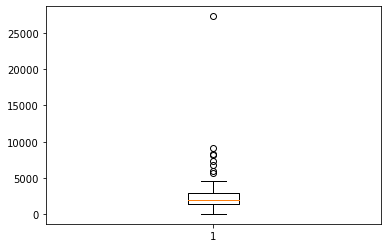

plot of feature percent_city is {'whiskers': [<matplotlib.lines.Line2D object at 0x7fe0ad43c390>, <matplotlib.lines.Line2D object at 0x7fe0ad44f650>], 'caps': [<matplotlib.lines.Line2D object at 0x7fe0ad44fb50>, <matplotlib.lines.Line2D object at 0x7fe0ad4729d0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fe0ad448410>], 'medians': [<matplotlib.lines.Line2D object at 0x7fe0ad3d55d0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fe0ad3d5ad0>], 'means': []}


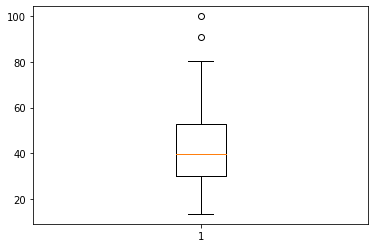

plot of feature percent_senior is {'whiskers': [<matplotlib.lines.Line2D object at 0x7fe0ad3b7f90>, <matplotlib.lines.Line2D object at 0x7fe0ad3bd590>], 'caps': [<matplotlib.lines.Line2D object at 0x7fe0ad3bda90>, <matplotlib.lines.Line2D object at 0x7fe0ad3bdf90>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fe0ad3b7350>], 'medians': [<matplotlib.lines.Line2D object at 0x7fe0ad3c4510>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fe0ad3c4a10>], 'means': []}


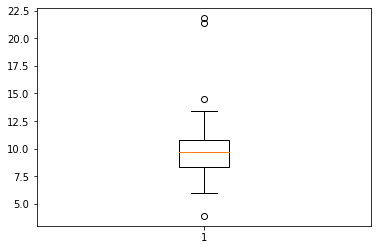

plot of feature physicians is {'whiskers': [<matplotlib.lines.Line2D object at 0x7fe0ad332310>, <matplotlib.lines.Line2D object at 0x7fe0ad3328d0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fe0ad332dd0>, <matplotlib.lines.Line2D object at 0x7fe0ad32a6d0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fe0ad32a690>], 'medians': [<matplotlib.lines.Line2D object at 0x7fe0ad339850>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fe0ad339d50>], 'means': []}


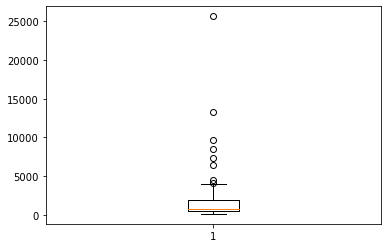

plot of feature hospital_beds is {'whiskers': [<matplotlib.lines.Line2D object at 0x7fe0ad29f650>, <matplotlib.lines.Line2D object at 0x7fe0ad29fc10>], 'caps': [<matplotlib.lines.Line2D object at 0x7fe0ad2979d0>, <matplotlib.lines.Line2D object at 0x7fe0ad2a7650>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fe0ad297990>], 'medians': [<matplotlib.lines.Line2D object at 0x7fe0ad2a7b90>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fe0ad29fc90>], 'means': []}


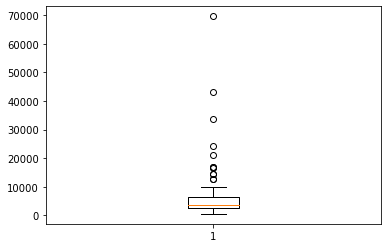

plot of feature graduates is {'whiskers': [<matplotlib.lines.Line2D object at 0x7fe0ad290410>, <matplotlib.lines.Line2D object at 0x7fe0ad2909d0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fe0ad290ed0>, <matplotlib.lines.Line2D object at 0x7fe0ad2887d0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fe0ad288790>], 'medians': [<matplotlib.lines.Line2D object at 0x7fe0ad218950>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fe0ad218e50>], 'means': []}


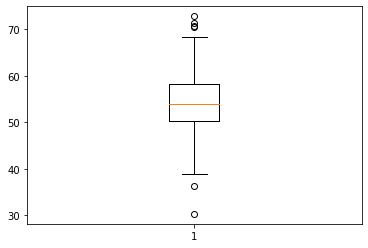

plot of feature labor is {'whiskers': [<matplotlib.lines.Line2D object at 0x7fe0ad1e7350>, <matplotlib.lines.Line2D object at 0x7fe0ad1fa610>], 'caps': [<matplotlib.lines.Line2D object at 0x7fe0ad1fab10>, <matplotlib.lines.Line2D object at 0x7fe0ad1fab90>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fe0ad1f23d0>], 'medians': [<matplotlib.lines.Line2D object at 0x7fe0ad203590>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fe0ad203a90>], 'means': []}


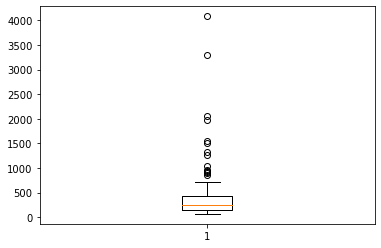

plot of feature income is {'whiskers': [<matplotlib.lines.Line2D object at 0x7fe0ad16d410>, <matplotlib.lines.Line2D object at 0x7fe0ad16d9d0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fe0ad16ded0>, <matplotlib.lines.Line2D object at 0x7fe0ad1647d0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fe0ad164790>], 'medians': [<matplotlib.lines.Line2D object at 0x7fe0ad173950>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fe0ad173e50>], 'means': []}


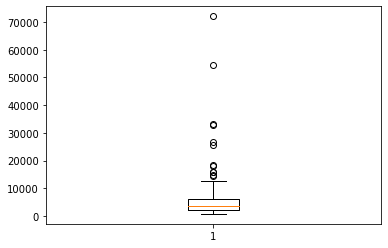

plot of feature region is {'whiskers': [<matplotlib.lines.Line2D object at 0x7fe0ad19aed0>, <matplotlib.lines.Line2D object at 0x7fe0ad203550>], 'caps': [<matplotlib.lines.Line2D object at 0x7fe0ad203490>, <matplotlib.lines.Line2D object at 0x7fe0ad203290>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fe0ad1b4590>], 'medians': [<matplotlib.lines.Line2D object at 0x7fe0ad1f2ad0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fe0ad1f2390>], 'means': []}


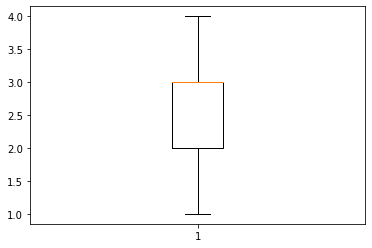

plot of feature crime_rate is {'whiskers': [<matplotlib.lines.Line2D object at 0x7fe0ad2e7990>, <matplotlib.lines.Line2D object at 0x7fe0ad2e7c90>], 'caps': [<matplotlib.lines.Line2D object at 0x7fe0ad2adcd0>, <matplotlib.lines.Line2D object at 0x7fe0ad353f90>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fe0ad2ade50>], 'medians': [<matplotlib.lines.Line2D object at 0x7fe0ad3537d0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fe0ad2e75d0>], 'means': []}


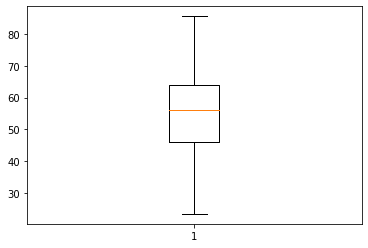

In [9]:
for col in train.columns:
    plot = plt.boxplot(train[col])
    print(f'plot of feature {col} is {plot}')
    plt.show()

### IQR score

According to Wikipedia,
The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.
In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.
It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers

In [10]:
# We are deleting the outliers from quartile 12th percentile and 88th percentile as appropriate for our model.
Q1 = train.quantile(0.12)
Q3 = train.quantile(0.88)
IQR = Q3 - Q1
print(IQR)

land_area          3221.8800
percent_city         40.8160
percent_senior        4.5480
physicians         3079.9200
hospital_beds      8962.8000
graduates            18.7680
labor               783.8240
income            11379.4000
region                3.0000
crime_rate           30.5304
dtype: float64


In [11]:
#Deleting Outliers
train1 = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train1.shape

(90, 10)

In [12]:
train.shape

(99, 10)

# 5. Bivariate analysis

This type of data involves two different variables. The analysis of this type of data deals with causes and relationships and the analysis is done to find out the relationship among the two variables.

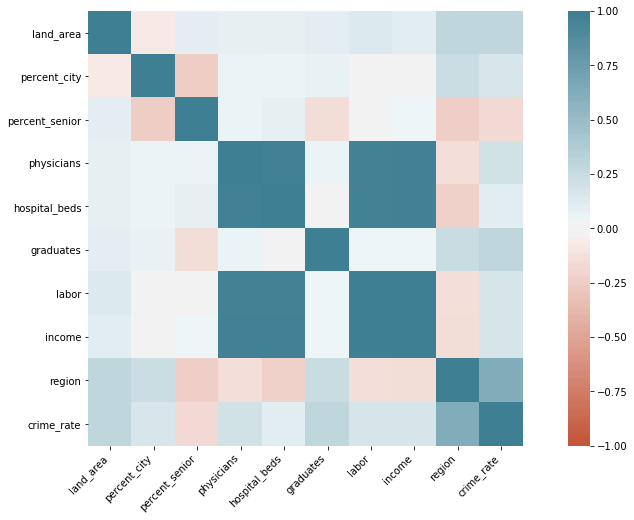

In [13]:
plt.figure(figsize=(16,8))
corr = train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

No need to drop any feature.

# 6. Features and labels

**Feature**
Features are individual independent variables which acts as the input in the system. Prediction models uses these features to make predictions. To make it simple, you can consider one column of your data set to be one feature. Features are also called attributes. And the number of features is dimensions.

**Label**
Labels are the final output or target Output. It can also be considered as the output classes.  We obtain labels as output when provided with features as input.

*Split the data into features and labels*

In [14]:
#Fetaures 
X = train1.drop('crime_rate', axis=1).copy()

In [15]:
X.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,labor,income,region
5,2815,23.1,6.7,7340,16941,68.3,1541.9,25663,3
6,8360,46.3,8.2,4047,14347,53.6,1321.2,18350,3
7,6794,60.1,6.3,4562,14333,51.7,1272.7,18221,3
8,3049,19.5,12.1,4005,21149,53.4,967.5,15826,1
9,4647,31.5,9.2,3916,12815,65.1,1032.2,14542,2


In [16]:
#label
y = train1['crime_rate'].copy()

In [17]:
y.head()

5    58.48
6    72.25
7    64.88
8    30.51
9    55.30
Name: crime_rate, dtype: float64

# 7. Train and Test Split
The train_test_split function is for splitting a single dataset for two different purposes: training and testing. The testing subset is for building your model. The testing subset is for using the model on unknown data to evaluate the performance of the model.

**training set**—a subset to train a model.

**test set**—a subset to test the trained model.

*We divide the data here into 80% train set and 20% test set.*

In [18]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y,train_size=0.8, test_size=0.2,random_state = 0)

# 8. Model creation

I am implementing different kinds of regression algorithm here and best model is used for final prediction.

# 8.1 Linear Regression
Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable

In [19]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
from sklearn.metrics import r2_score
predict = regr.predict(val_X)
r2_score(val_y,predict)

0.5869602440008068

# 8.2 XGBOOST Regression

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.

In [21]:
from sklearn.model_selection import GridSearchCV
import xgboost
#for tuning parameters
# parameters_for_testing = {
#    'colsample_bytree':[0.4,0.6,0.8],
# #    'gamma':[0,0.03,0.1,0.3],
# #    'min_child_weight':[1.5,6,10],
# #    'learning_rate':[0.1,0.07],
# #    'max_depth':[3,5],
# #    'n_estimators':[10000],
# #    'reg_alpha':[1e-5, 1e-2,  0.75],
# #    'reg_lambda':[1e-5, 1e-2, 0.45],
# #    'subsample':[0.6,0.95]  
# }

                    
# xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
#     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=-1, scale_pos_weight=1, seed=27)

# gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')
# gsearch1.fit(train_X,train_y)
# # print (gsearch1.grid_scores_)
# print('best params')
# print (gsearch1.best_params_)
# print('best score')
# print (gsearch1.best_score_)

#After tuning
xgb_model = xgboost.XGBRegressor(learning_rate =0.01, n_estimators=10000, max_depth=5,
    min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=-1, scale_pos_weight=1, seed=27)

xgb_model.fit(train_X,train_y)
predict = xgb_model.predict(val_X)
r2_score(val_y,predict)

0.5602452530325475

# 8.3 Ensemble method

The idea behind the VotingRegressor is to combine conceptually different machine learning regressors and return the average predicted values. Such a regressor can be useful for a set of equally well performing models in order to balance out their individual weaknesses.

Below i'm combining three ml regressor method- GradientBoostingRegressor, RandomForestRegressor and LinearRegression

In [22]:
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

# Training classifiers
reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(train_X,train_y)
predict = ereg.predict(val_X)
r2_score(val_y,predict)

0.6487589673790477

This method is giving us a optimal result. 

### Let's now make prediction on final test data with full train data.

In [23]:
ereg_final = ereg.fit(X,y)
predict = ereg_final.predict(test1)


In [24]:
sub = pd.DataFrame(data=predict
                   ,columns=["crime_rate"])

In [25]:
sub.to_csv("submission.csv")